In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns',30)
import numpy as np

In [ ]:
df = pd.read_csv('/content/sample_data/Warehouse Report.csv',header = 1)


In [ ]:
df.head(5)

,ITEM ID,LIST OF ITEMS,SKU,\n Warehouse Name\n,Item Type,Purchase Invoice Channel,Order Priority,Order Date,Order ID,Qty Ordered,Qty in,Qty out,Stock On Hand,Committed Stock,Available for sale,status,unit,Selling Price,Cost Price,created_by,Total money on hold,Item Availability rating,OFFLINE rating,Online booking Rating,Packaging Rating,Delivery Rating
0,4051872000000512232,Product 1,7.388505e+11,ABC Wholesale,Cosmetics,Offline,LOW/MEDIUM,2023-03-02,15157614,128868,106779.934592,66203.559447,40576.375145,4332,36244.375145,active,pcs,3.57,2.75,xyz,36955.0,4.0,2,3,3,0.0
1,4051872000000242010,Product 2,3.846754e+11,ABC Wholesale A#103,Cosmetics,Offline,LOW/MEDIUM,2019-02-13,57105109,145707,120732.718205,74854.285287,45878.432918,34596,11282.432918,active,pcs,8.45,6.50,xyz,56510.0,2.0,2,3,4,4.0
2,4051872000002001964,Product 3,8.591984e+11,ABC Distribution,Novelities,Online,MOST PRIORITY,2023-08-14,15319448,136952,113478.331334,70356.565427,43121.765907,1000,42121.765907,active,PCS,17.00,13.75,xyz,32057.0,0.0,2,2,3,NaN
3,4051872000000383602,Product 4,5.097334e+11,ABC Wholesale-khaled,Cosmetics,Offline,LOW,2016-11-02,43709238,123910,102671.739263,63656.478343,39015.260920,9096,29919.260920,active,PCS,8.45,6.50,xyz,39284.0,4.0,3,1,1,0.0
4,4051872000003592104,Product 5,5.255261e+11,ABC Wholesale,ExoticDrinks,Offline,MEDIUM,2019-01-13,64467696,132856,110084.388601,68252.320932,41832.067668,5661,36171.067668,active,PCS,3.00,2.25,xyz,28408.0,3.0,4,2,2,0.0


In [ ]:
df.rename(columns={'\n          Warehouse Name\n        ' : 'Warehouse_Name'},inplace=True)

In [ ]:
df.isnull().sum()

,0
ITEM ID,0
LIST OF ITEMS,0
SKU,23
Warehouse_Name,0
Item Type,0
Purchase Invoice Channel,0
Order Priority,0
Order Date,0
Order ID,0
Qty Ordered,0


In [ ]:
median_offline = df[df['Purchase Invoice Channel'] == 'Offline']['Delivery Rating'].median()
median_online = df[df['Purchase Invoice Channel'] == 'Online']['Delivery Rating'].median()
count = 0
df.loc[(df['Purchase Invoice Channel'] == 'Offline') & (df['Delivery Rating'].isnull()), 'Delivery Rating'] = median_offline
df.loc[(df['Purchase Invoice Channel'] == 'Online') & (df['Delivery Rating'].isnull()), 'Delivery Rating'] = median_online

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
ITEM ID,0
LIST OF ITEMS,0
SKU,0
Warehouse_Name,0
Item Type,0
Purchase Invoice Channel,0
Order Priority,0
Order Date,0
Order ID,0
Qty Ordered,0


In [ ]:
df.drop_duplicates(inplace=True)
df.describe()

,ITEM ID,SKU,Order ID,Qty Ordered,Qty in,Qty out,Stock On Hand,Committed Stock,Available for sale,Selling Price,Cost Price,Total money on hold,Item Availability rating,OFFLINE rating,Online booking Rating,Packaging Rating,Delivery Rating
count,2.814800e+04,2.814800e+04,2.814800e+04,28148.000000,28148.000000,28148.000000,28148.000000,28148.000000,28148.000000,28148.000000,28148.000000,2.814800e+04,28148.000000,28148.000000,28148.000000,28148.000000,28148.000000
mean,4.051872e+18,5.491803e+11,5.516104e+07,134991.041459,111853.482460,69349.159125,42504.323335,9046.923511,33457.399823,193.356120,95.501178,3.815901e+06,2.996767,3.506999,3.492753,3.550092,3.573575
std,3.309784e+08,2.606405e+11,2.601663e+07,8663.261770,7178.372639,4450.591036,2727.781603,14044.470298,14323.557624,141.329492,91.257768,4.046362e+06,1.486390,1.355590,1.295059,1.221286,1.205538
min,4.051872e+18,1.000024e+11,1.000045e+07,120002.000000,99433.573199,61648.815383,37784.757815,1000.000000,-53144.204461,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000
25%,4.051872e+18,3.228295e+11,3.255839e+07,127458.000000,105611.609579,65479.197939,40132.411640,1000.000000,30588.872841,61.311016,13.000000,6.542636e+04,2.000000,2.000000,3.000000,3.000000,3.000000
50%,4.051872e+18,5.495638e+11,5.554539e+07,134991.500000,111853.862406,69349.394692,42504.467714,1000.000000,38681.782479,179.665505,60.137992,2.200157e+06,3.000000,4.000000,4.000000,4.000000,4.000000
75%,4.051872e+18,7.735068e+11,7.784133e+07,142481.000000,118059.656863,73196.987255,44862.669608,11698.750000,42210.558608,317.693440,168.352981,7.119805e+06,4.000000,5.000000,5.000000,4.000000,4.000000
max,4.051872e+18,9.999561e+11,9.999901e+07,149999.000000,124289.066401,77059.221168,47229.845232,93295.000000,46229.530365,935.000000,660.000000,2.650137e+07,5.000000,5.000000,5.000000,5.000000,5.000000


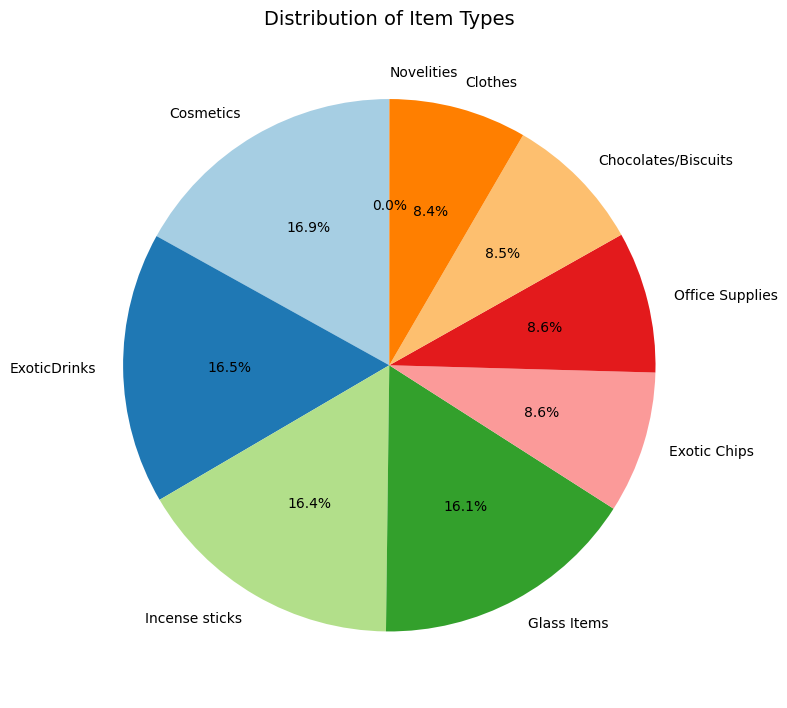

In [ ]:
item_type_distribution = df['Item Type'].value_counts()
plt.figure(figsize=(8, 8))
item_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Item Types', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

<Figure size 1000x5000 with 0 Axes>

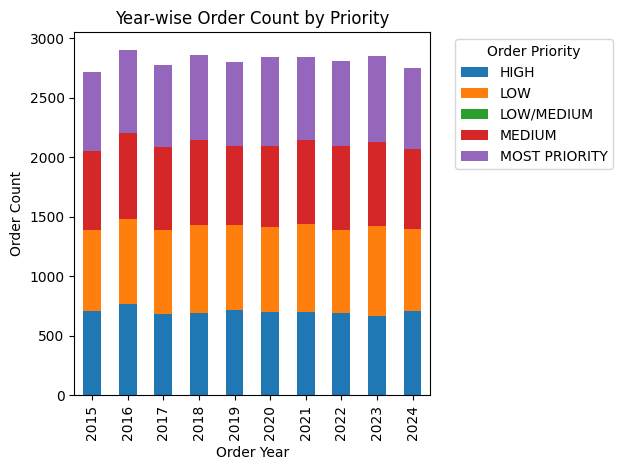

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order_Date'].dt.year
Yearwise_df = pd.pivot_table(data=df, index='Order Year', columns='Order Priority', values='Order ID', aggfunc='count')

plt.figure(figsize=(10, 50))
Yearwise_df.plot(kind='bar', stacked=True)


plt.legend(title='Order Priority', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Year-wise Order Count by Priority')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

<Figure size 1000x5000 with 0 Axes>

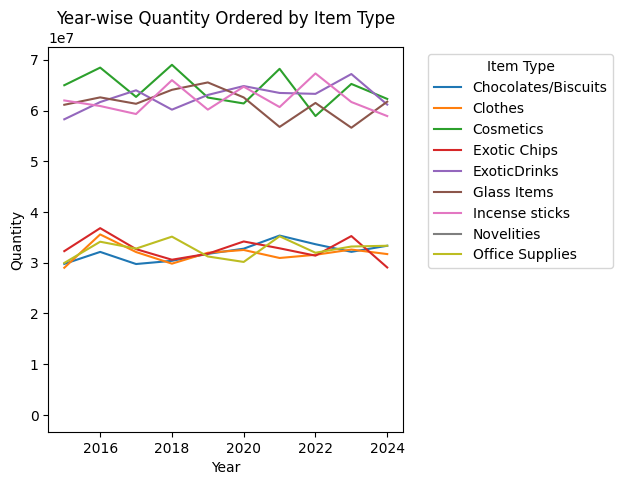

In [ ]:
plt.figure(figsize=(10, 50))
Yearwise_df_1 = pd.pivot_table(data=df, index='Order Year', columns='Item Type', values='Qty Ordered', aggfunc='sum')
Yearwise_df_1.plot(kind='line')

plt.title('Year-wise Quantity Ordered by Item Type')
plt.ylabel('Quantity')
plt.xlabel('Year')

plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<ipython-input-53-948d64f91c5f>:1: FutureWarning: The provided callable <function sum at 0x7d9d8cbf8670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  x = pd.pivot_table(data=df, index='Item Type', values=['Qty Ordered', 'Qty in'], aggfunc=np.sum)


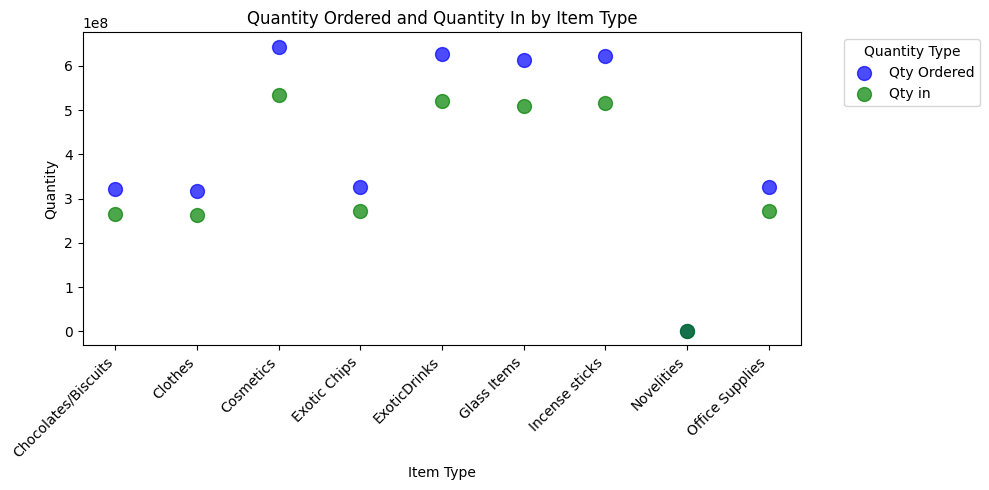

In [ ]:
x = pd.pivot_table(data=df, index='Item Type', values=['Qty Ordered', 'Qty in'], aggfunc=np.sum)

# Plot a scatter plot
plt.figure(figsize=(10, 5))

# Scatter plot for Qty Ordered
plt.scatter(x.index, x['Qty Ordered'], color='blue', label='Qty Ordered', s=100, alpha=0.7)

# Scatter plot for Qty in
plt.scatter(x.index, x['Qty in'], color='green', label='Qty in', s=100, alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.title('Quantity Ordered and Quantity In by Item Type')
plt.ylabel('Quantity')
plt.xlabel('Item Type')

# Position the legend outside the plot
plt.legend(title='Quantity Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

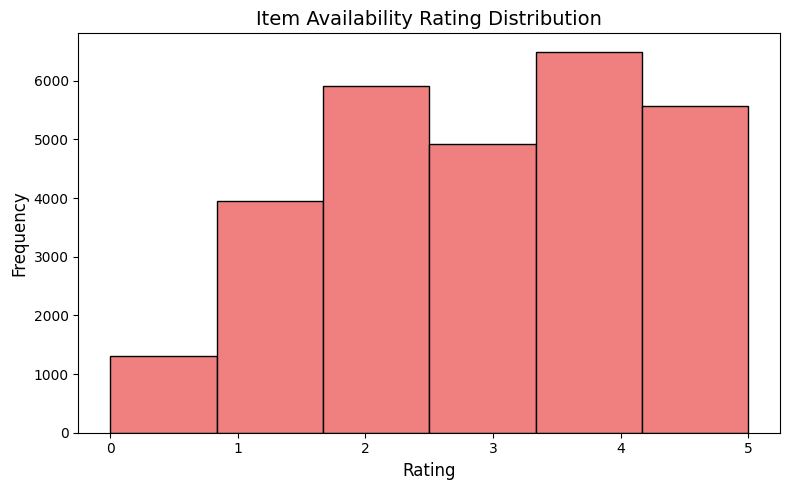

In [ ]:
plt.figure(figsize=(8, 5))

# Convert to numeric, coerce errors to NaN, then drop NaNs before converting to int
df['Item Availability rating'] = pd.to_numeric(df['Item Availability rating'], errors='coerce')
df['Item Availability rating'] = df['Item Availability rating'].dropna().astype(int)

df['Item Availability rating'].plot(kind='hist', bins=6, color='lightcoral', edgecolor='black')
plt.title('Item Availability Rating Distribution', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

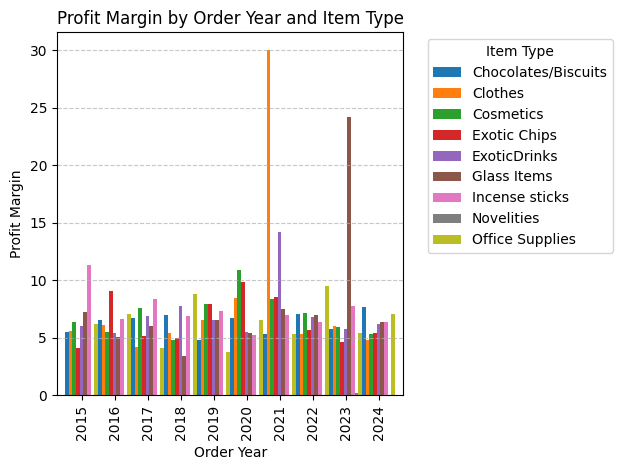

In [ ]:
df['Profit %']  = (df['Selling Price']-df['Cost Price'])/df['Cost Price']
profitmargin = pd.pivot_table(data=df , index= 'Order Year' , columns='Item Type' , values ='Profit %' , aggfunc='mean')
plt.figure(figsize=(12, 12))
profitmargin.plot(kind='bar', width=1)

plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Profit Margin by Order Year and Item Type')
plt.ylabel('Profit Margin')
plt.xlabel('Order Year')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['ITEM ID', 'LIST OF ITEMS', 'SKU', 'Warehouse_Name', 'Item Type',
       'Purchase Invoice Channel', 'Order Priority', 'Order Date', 'Order ID',
       'Qty Ordered', 'Qty in', 'Qty out', 'Stock On Hand', 'Committed Stock',
       'Available for sale', 'status', 'unit', 'Selling Price', 'Cost Price',
       'created_by', 'Total money on hold', 'Item Availability rating',
       'OFFLINE rating', 'Online booking Rating', 'Packaging Rating',
       'Delivery Rating', 'Order_Date', 'Order Year', 'Profit %'],
      dtype='object')

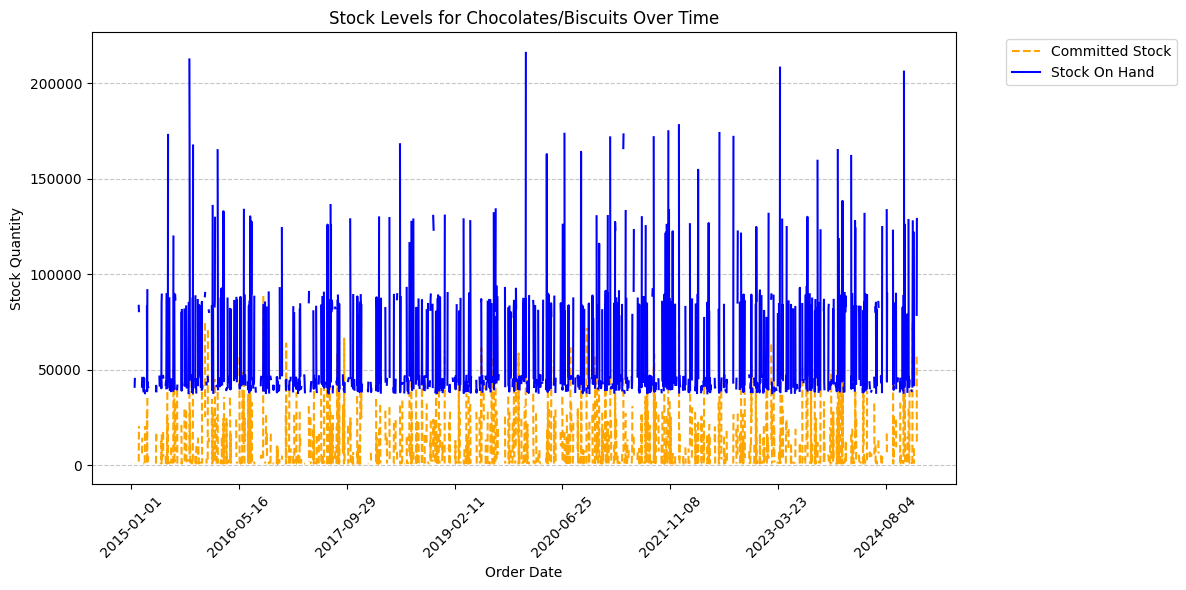

In [ ]:
StockINandCommited = pd.pivot_table(data=df , index = 'Order Date' , columns ='Item Type' , values = ['Stock On Hand','Committed Stock'], aggfunc='sum')

plt.figure(figsize=(12, 6))
StockINandCommited[('Committed Stock', 'Chocolates/Biscuits')].plot.line(color='orange', linestyle='--', label='Committed Stock')
StockINandCommited[('Stock On Hand', 'Chocolates/Biscuits')].plot.line(color='blue', label='Stock On Hand')

plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

plt.title('Stock Levels for Chocolates/Biscuits Over Time')
plt.xlabel('Order Date')
plt.ylabel('Stock Quantity')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
numerical_col = df.select_dtypes(include = ['int64','float64'])

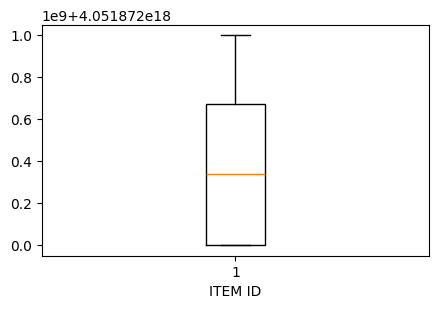

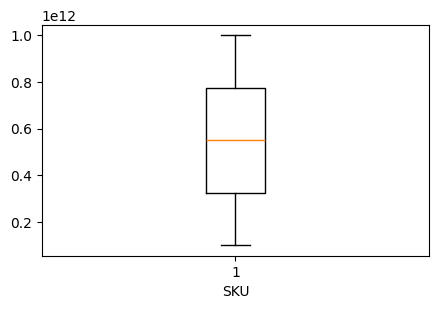

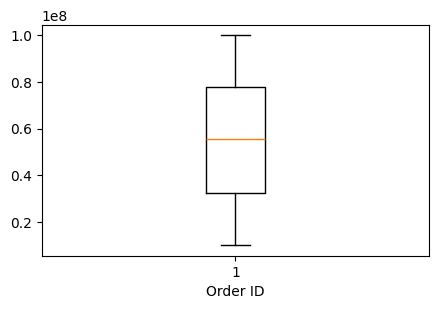

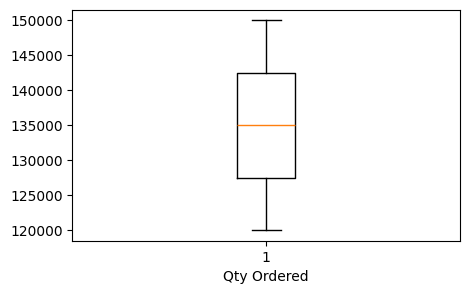

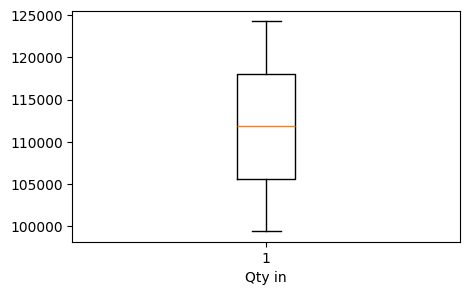

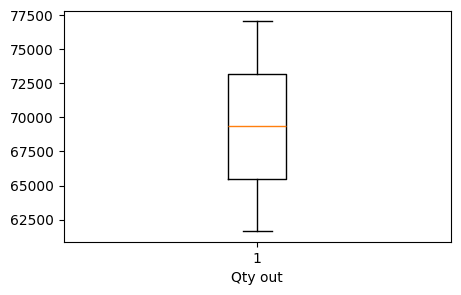

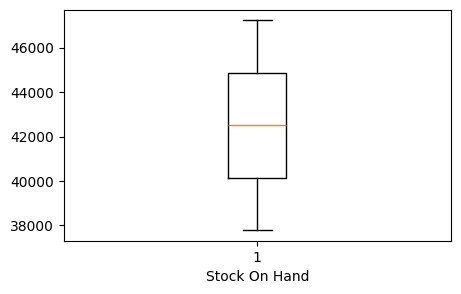

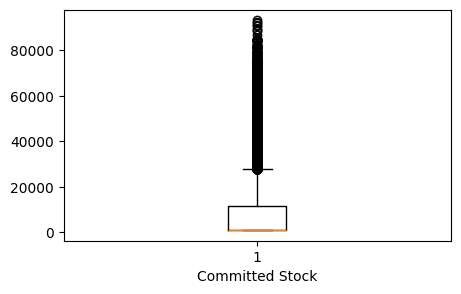

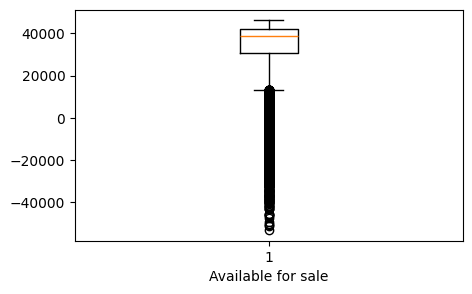

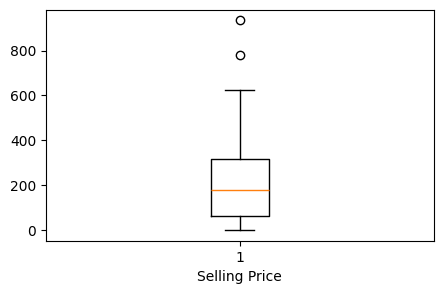

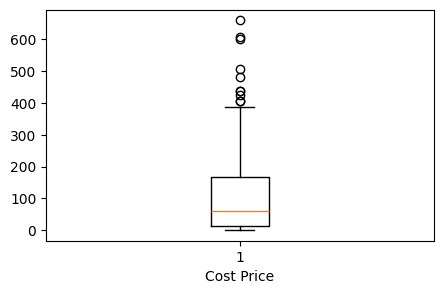

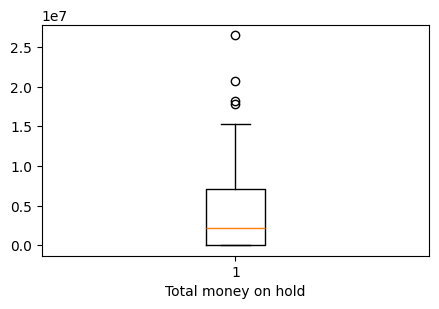

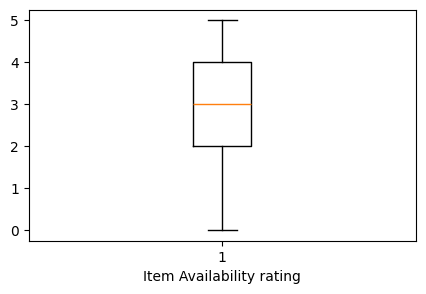

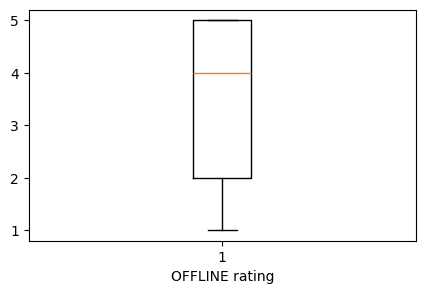

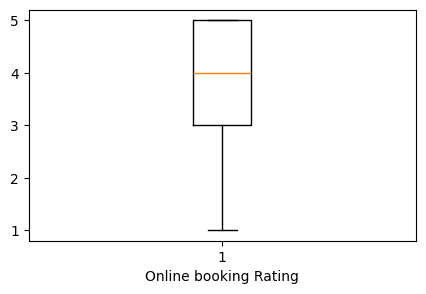

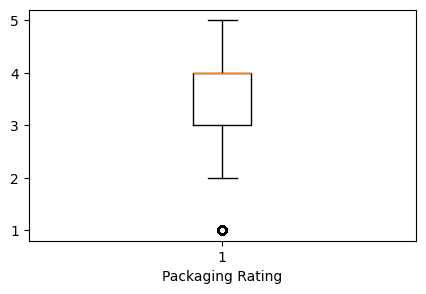

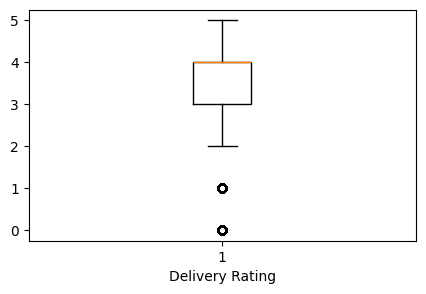

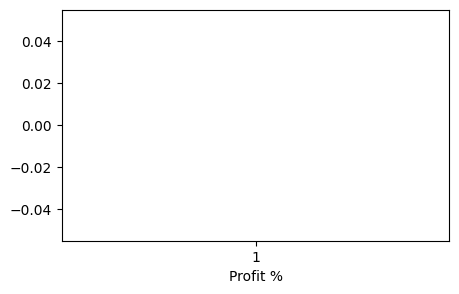

In [ ]:
for col in numerical_col.columns.tolist():
    plt.figure(figsize=(5, 3))
    plt.boxplot(x=col,data=numerical_col)
    plt.xlabel(col)
    plt.show()

Question 5: How do the variables correlate with one another?

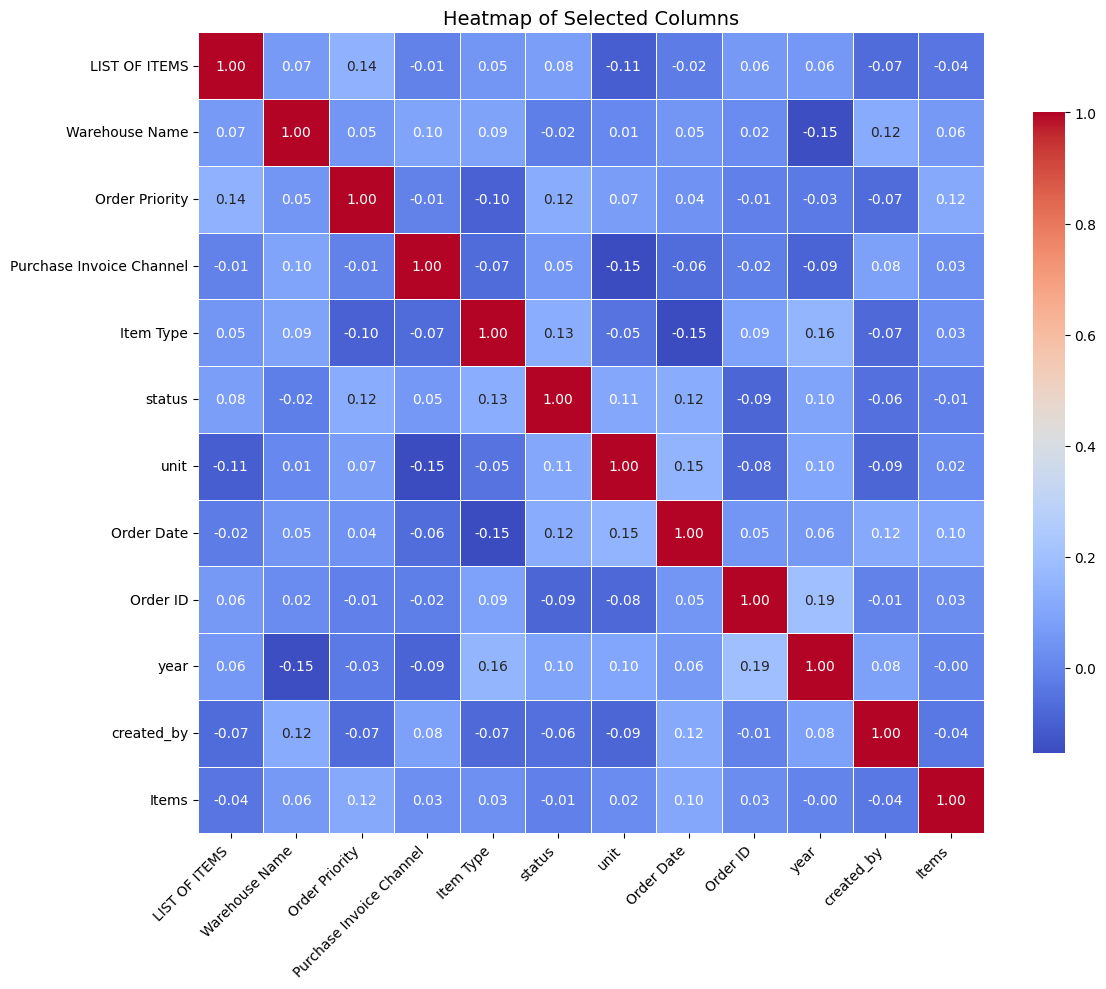

In [ ]:
data = {
    'LIST OF ITEMS': np.random.choice(['Item1', 'Item2', 'Item3'], size=100),
    'Warehouse Name': np.random.choice(['WH_A', 'WH_B', 'WH_C'], size=100),
    'Order Priority': np.random.choice(['High', 'Medium', 'Low'], size=100),
    'Purchase Invoice Channel': np.random.choice(['Online', 'Offline'], size=100),
    'Item Type': np.random.choice(['Type1', 'Type2'], size=100),
    'status': np.random.choice(['Delivered', 'Pending', 'Cancelled'], size=100),
    'unit': np.random.randint(1, 100, size=100),
    'Order Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Order ID': np.random.randint(1000, 2000, size=100),
    'year': np.random.randint(2020, 2024, size=100),
    'created_by': np.random.choice(['User1', 'User2', 'User3'], size=100),
    'Items': np.random.randint(1, 50, size=100)
}

df_sub = pd.DataFrame(data)


columns = ['LIST OF ITEMS', 'Warehouse Name', 'Order Priority', 'Purchase Invoice Channel',
           'Item Type', 'status', 'unit', 'Order Date', 'Order ID', 'year', 'created_by', 'Items']

df_subset = df_sub[columns]
df_encoded = df_subset.copy()

# Convert categorical columns to numerical values
categorical_columns = ['LIST OF ITEMS', 'Warehouse Name', 'Order Priority', 'Purchase Invoice Channel',
                       'Item Type', 'status', 'created_by']

for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Convert 'Order Date' to a numerical representation (e.g., ordinal)
df_encoded['Order Date'] = df_encoded['Order Date'].map(lambda x: x.toordinal())

plt.figure(figsize=(12, 10))
heatmap = sb.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Customize the heatmap
plt.title("Heatmap of Selected Columns", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Question 2: How can we measure how seasonal patterns and external shocks affect the amoun of inventory needed?

In [ ]:
Demand_Df =  df[['Available for sale','Order Date']]
Demand_Df.head(5)

,Available for sale,Order Date
0,36244.375145,2023-03-02
1,11282.432918,2019-02-13
2,42121.765907,2023-08-14
3,29919.260920,2016-11-02
4,36171.067668,2019-01-13


In [ ]:
Demand_Df.dtypes

,0
Available for sale,float64
Order Date,object


In [ ]:
# Converting Order Dat

print(Demand_Df.dtypes)

## Extracting Month Year from the Order Date column


Demand_Df['Month Year'] = Demand_Df['Order Date'].str.slice(start=0,stop=7)
Demand_Df.info()

Available for sale    float64
Order Date             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 28148 entries, 0 to 28178
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Available for sale  28148 non-null  float64
 1   Order Date          28148 non-null  object 
 2   Month Year          28148 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.9+ MB


<ipython-input-63-6df8f146becf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demand_Df['Month Year'] = Demand_Df['Order Date'].str.slice(start=0,stop=7)


In [ ]:
Demand_Df.head(5)

,Available for sale,Order Date,Month Year
0,36244.375145,2023-03-02,2023-03
1,11282.432918,2019-02-13,2019-02
2,42121.765907,2023-08-14,2023-08
3,29919.260920,2016-11-02,2016-11
4,36171.067668,2019-01-13,2019-01


In [ ]:
# Feature Engineering to create a Demand Column from Available on Sales
# mapping Available for Sale > 0 as 0 and Available for Sale < 0 as Postive Demand
Demand_Df['Demand'] = np.where(Demand_Df['Available for sale'] < 0  , -Demand_Df['Available for sale'] , 0)
Demand_Df['Demand'].describe()

<ipython-input-65-b2f95da3456d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demand_Df['Demand'] = np.where(Demand_Df['Available for sale'] < 0  , -Demand_Df['Available for sale'] , 0)


,Demand
count,28148.000000
mean,597.863397
std,3561.915209
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,53144.204461


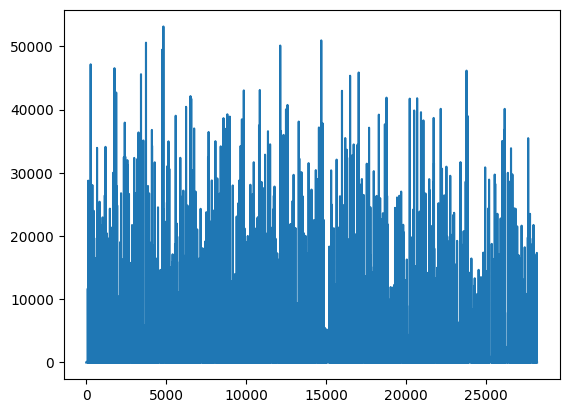

In [ ]:
Demand_Df['Demand'].plot()
plt.show()

In [ ]:
Final_Df = Demand_Df.groupby(['Month Year']).agg(sum)['Demand'].reset_index()
Final_Df.set_index('Month Year',inplace=True)

<ipython-input-67-425394fdffff>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Final_Df = Demand_Df.groupby(['Month Year']).agg(sum)['Demand'].reset_index()


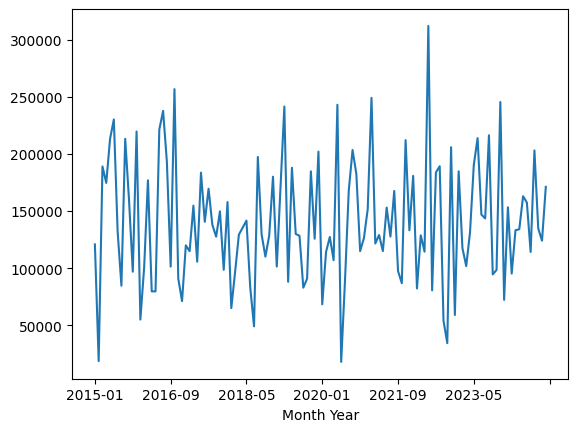

In [ ]:
Final_Df['Demand'].plot()
plt.show()

Question 3: Is it possible to more precisely predict future stock needs by using predictive analytic tools?

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(Final_Df['Demand'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -13.041976
p-value: 0.000000


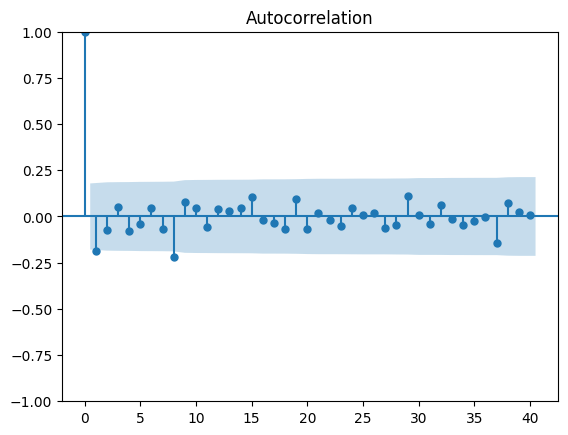

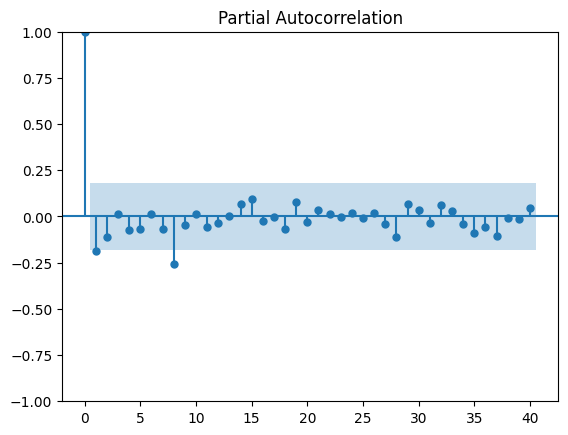

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Final_Df['Demand'], lags=40)
plot_pacf(Final_Df['Demand'], lags=40)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


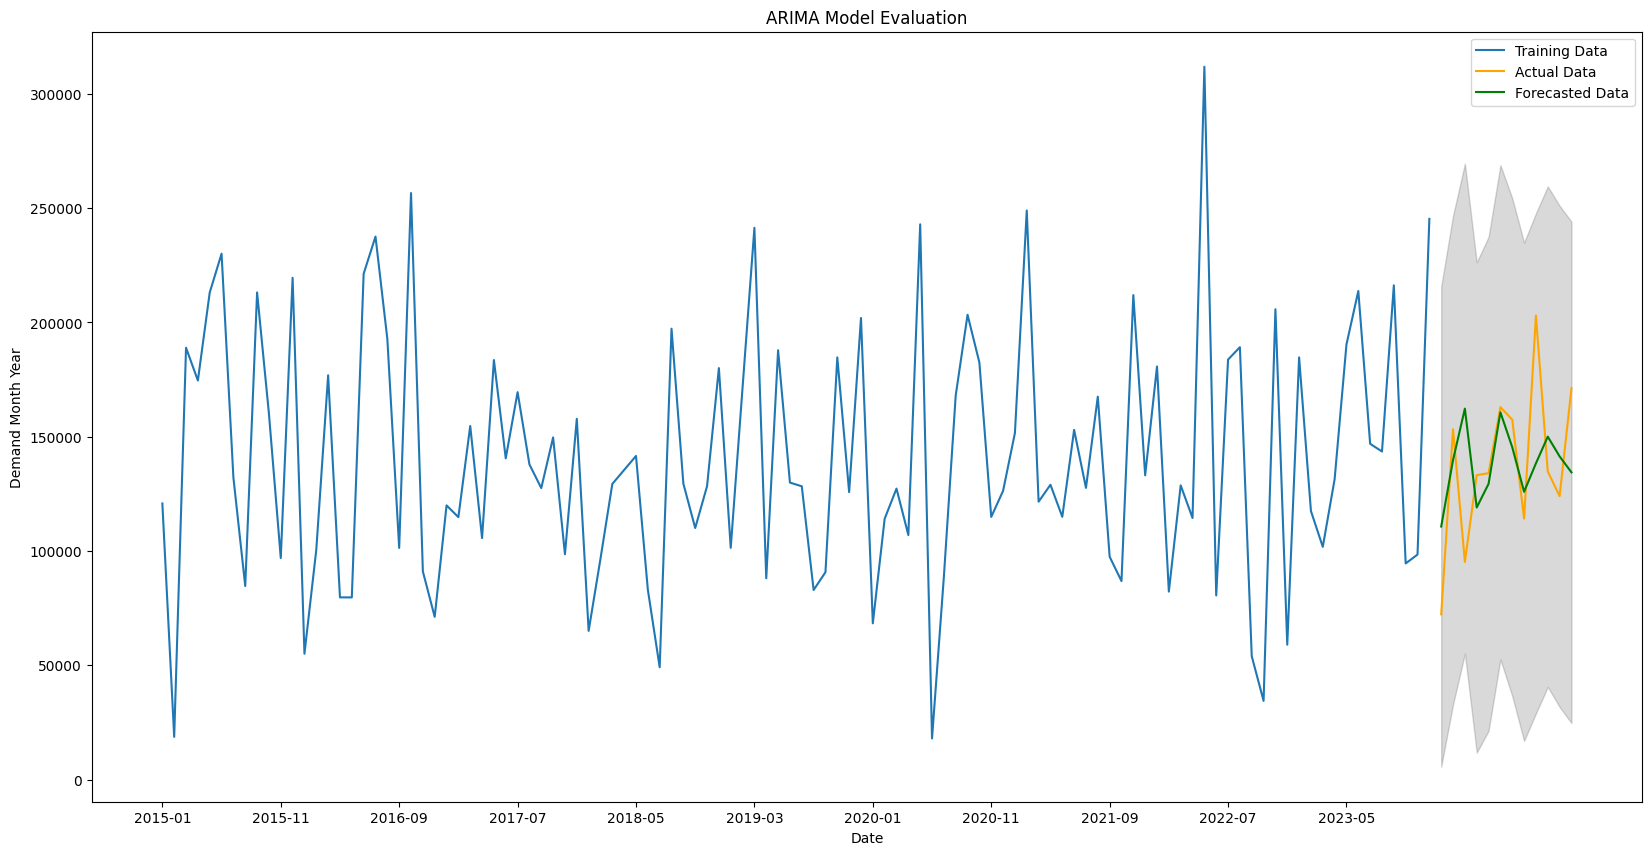

RMSE: 32566.39115461426


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
mask = Final_Df.index.str.contains(rf"^2024")

train_df = Final_Df[~mask]

test_df = Final_Df[mask]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train_df['Demand'], order=(5, 0, 2))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test_df))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test_df.index)

# Calculate the mean squared error
mse = mean_squared_error(test_df['Demand'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(20,10))
plt.plot(train_df['Demand'], label='Training Data')
plt.plot(test_df['Demand'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test_df.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.xticks(train_df.index[::10])
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Demand Month Year')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
test_forecast_series

,predicted_mean
Month Year,
2024-01,110719.128637
2024-02,139836.373238
2024-03,162320.916444
2024-04,119045.436322
2024-05,129390.343116
2024-06,160718.152963
2024-07,145445.796268
2024-08,125928.228993
2024-09,138370.484689


*Question* 4: What is the impact of packagibg and delivery ratings on customer satisfaction and consequently, the likelyhood of making more purchases?

In [ ]:
Q1 = np.percentile( df['Committed Stock'] , 25)
Q3 = np.percentile(df['Committed Stock'],75)

lowerBound =  Q1 - 1.5*(Q3-Q1)
upperBound =  Q3 + 1.5*(Q3-Q1)

outlier = df[(df['Committed Stock'] < lowerBound) | (df['Committed Stock'] > upperBound)]

In [ ]:
len(outlier)

3011

In [ ]:
len(df)

28148

In [ ]:
df.select_dtypes(exclude= ['object']).corr()

,ITEM ID,SKU,Order ID,Qty Ordered,Qty in,Qty out,Stock On Hand,Committed Stock,Available for sale,Selling Price,Cost Price,Total money on hold,Item Availability rating,OFFLINE rating,Online booking Rating,Packaging Rating,Delivery Rating,Order_Date,Order Year,Profit %
ITEM ID,1.000000,-0.015585,-0.003744,-0.002361,-0.002361,-0.002361,-0.002361,-0.011012,0.010348,-0.133379,0.242584,0.300666,0.193954,0.053899,0.158434,0.129871,0.139597,-0.008680,-0.008667,-0.115108
SKU,-0.015585,1.000000,0.003185,0.005841,0.005841,0.005841,0.005841,-0.009897,0.010817,0.000430,-0.006387,-0.006662,-0.004157,-0.003740,-0.015016,-0.004001,-0.012813,0.010022,0.009419,-0.000134
Order ID,-0.003744,0.003185,1.000000,-0.003334,-0.003334,-0.003334,-0.003334,0.008573,-0.009041,0.006048,0.008539,0.007125,-0.003470,-0.003151,-0.011216,-0.004529,-0.008073,0.007795,0.007879,0.003909
Qty Ordered,-0.002361,0.005841,-0.003334,1.000000,1.000000,1.000000,1.000000,-0.006217,0.196536,-0.011952,-0.011343,0.051332,0.001481,0.003991,0.002801,-0.005101,0.000264,-0.001999,-0.001940,0.002169
Qty in,-0.002361,0.005841,-0.003334,1.000000,1.000000,1.000000,1.000000,-0.006217,0.196536,-0.011952,-0.011343,0.051332,0.001481,0.003991,0.002801,-0.005101,0.000264,-0.001999,-0.001940,0.002169
Qty out,-0.002361,0.005841,-0.003334,1.000000,1.000000,1.000000,1.000000,-0.006217,0.196536,-0.011952,-0.011343,0.051332,0.001481,0.003991,0.002801,-0.005101,0.000264,-0.001999,-0.001940,0.002169
Stock On Hand,-0.002361,0.005841,-0.003334,1.000000,1.000000,1.000000,1.000000,-0.006217,0.196536,-0.011952,-0.011343,0.051332,0.001481,0.003991,0.002801,-0.005101,0.000264,-0.001999,-0.001940,0.002169
Committed Stock,-0.011012,-0.009897,0.008573,-0.006217,-0.006217,-0.006217,-0.006217,1.000000,-0.981700,0.006334,-0.004432,-0.005842,-0.008910,0.004807,-0.002466,-0.015347,-0.005580,-0.004109,-0.004557,-0.002205
Available for sale,0.010348,0.010817,-0.009041,0.196536,0.196536,0.196536,0.196536,-0.981700,1.000000,-0.008487,0.002185,0.015503,0.009019,-0.003954,0.002951,0.014077,0.005522,0.003648,0.004098,0.002575
Selling Price,-0.133379,0.000430,0.006048,-0.011952,-0.011952,-0.011952,-0.011952,0.006334,-0.008487,1.000000,0.717014,0.665828,-0.137103,-0.043224,-0.138937,-0.104896,-0.094754,-0.004612,-0.004203,0.087631


In [ ]:

correlation_matrix = df.select_dtypes(exclude= ['object']).corr().abs()

# Filter columns to remove based on correlation threshold
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_remove = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print("list of Highly Correlated Columns")
print(columns_to_remove)

list of Highly Correlated Columns
['Qty in', 'Qty out', 'Stock On Hand', 'Available for sale', 'Total money on hold', 'Order Year']


Handling Categorical Features

In [ ]:
df['Purchase Invoice Channel'].value_counts()

,count
Purchase Invoice Channel,
Offline,14208
Online,13940


In [ ]:
df['Purchase Invoice Channel'].replace({'Offline':1,'Online':0},inplace=True)
df['status'].replace({'active':1,'inactive':0},inplace=True)

<ipython-input-81-30e692866980>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['status'].replace({'active':1,'inactive':0},inplace=True)
<ipython-input-81-30e692866980>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['status'].replace({'active':1,'inactive':0},inplace=True)


In [ ]:
df['status'].value_counts()

,count
status,
active,28128
inactive,20


In [ ]:
df['unit'].value_counts()

,count
unit,
Pcs,21633
PCS,2315
pcs,2223
BOX,1206
box,651
CASE,31
PACK,31
DISPLAY,26
JAR,10


In [ ]:
 df.drop('unit',axis = 1 , inplace=True)

In [ ]:
df['Order Priority'].value_counts()

,count
Order Priority,
LOW,7127
HIGH,7051
MOST PRIORITY,7022
MEDIUM,6946
LOW/MEDIUM,2


In [ ]:
# First merging the LOW/Medium Order Priority as Medium as it is only 2 records
df.replace({'LOW/MEDIUM' :'MEDIUM'},inplace=True)
# Now replacing this Order Priority based on order as it Ordinal Column
df.replace({'MOST PRIORITY':3 , 'HIGH':2 ,'MEDIUM' : 1 , 'LOW':0},inplace=True)

<ipython-input-85-77e39a1d3d0b>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'MOST PRIORITY':3 , 'HIGH':2 ,'MEDIUM' : 1 , 'LOW':0},inplace=True)


In [ ]:
# Creating a dummies variable for Warehouse_Name , Item_Type as it Nominal Col

df = pd.get_dummies(df,columns = ['Warehouse_Name','Item Type'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28148 entries, 0 to 28178
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ITEM ID                              28148 non-null  int64         
 1   LIST OF ITEMS                        28148 non-null  object        
 2   SKU                                  28148 non-null  float64       
 3   Purchase Invoice Channel             28148 non-null  int64         
 4   Order Priority                       28148 non-null  int64         
 5   Order Date                           28148 non-null  object        
 6   Order ID                             28148 non-null  int64         
 7   Qty Ordered                          28148 non-null  int64         
 8   Qty in                               28148 non-null  float64       
 9   Qty out                              28148 non-null  float64       
 10  Stock On Hand  

In [ ]:
df.columns.tolist()

['ITEM ID',
 'LIST OF ITEMS',
 'SKU',
 'Purchase Invoice Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Qty Ordered',
 'Qty in',
 'Qty out',
 'Stock On Hand',
 'Committed Stock',
 'Available for sale',
 'status',
 'Selling Price',
 'Cost Price',
 'created_by',
 'Total money on hold',
 'Item Availability rating',
 'OFFLINE rating',
 'Online booking Rating',
 'Packaging Rating',
 'Delivery Rating',
 'Order_Date',
 'Order Year',
 'Profit %',
 'Warehouse_Name_ABC Distribution',
 'Warehouse_Name_ABC Wholesale',
 'Warehouse_Name_ABC Wholesale A#103',
 'Warehouse_Name_ABC Wholesale-khaled',
 'Item Type_Chocolates/Biscuits',
 'Item Type_Clothes',
 'Item Type_Cosmetics',
 'Item Type_Exotic Chips',
 'Item Type_ExoticDrinks',
 'Item Type_Glass Items',
 'Item Type_Incense sticks',
 'Item Type_Novelities',
 'Item Type_Office Supplies']

In [ ]:
df['Customer Satisfication']  = (df[['Item Availability rating',
 'OFFLINE rating',
 'Online booking Rating',
 'Packaging Rating',
 'Delivery Rating']].sum(axis=1) > 15).astype(int)

df['Customer Satisfication'].value_counts()

,count
Customer Satisfication,
1,17971
0,10177


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Splitting the data into 0.7 train , 0.3 test data

Indepedent_feature = [
 'Purchase Invoice Channel',
 'Order Priority',
 'Qty Ordered',
 'Qty in',
 'Qty out',
 'Stock On Hand',
 'Committed Stock',
 'Available for sale',
 'status',
 'Selling Price',
 'Cost Price',
 'Total money on hold',
 'Customer Satisfication',
 'Warehouse_Name_ABC Distribution',
 'Warehouse_Name_ABC Wholesale',
 'Warehouse_Name_ABC Wholesale A#103',
 'Warehouse_Name_ABC Wholesale-khaled',
 'Item Type_Chocolates/Biscuits',
 'Item Type_Clothes',
 'Item Type_Cosmetics',
 'Item Type_Exotic Chips',
 'Item Type_ExoticDrinks',
 'Item Type_Glass Items',
 'Item Type_Incense sticks',
 'Item Type_Novelities',
 'Item Type_Office Supplies' ]
final_df = df[Indepedent_feature]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28148 entries, 0 to 28178
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Purchase Invoice Channel             28148 non-null  int64  
 1   Order Priority                       28148 non-null  int64  
 2   Qty Ordered                          28148 non-null  int64  
 3   Qty in                               28148 non-null  float64
 4   Qty out                              28148 non-null  float64
 5   Stock On Hand                        28148 non-null  float64
 6   Committed Stock                      28148 non-null  int64  
 7   Available for sale                   28148 non-null  float64
 8   status                               28148 non-null  int64  
 9   Selling Price                        28148 non-null  float64
 10  Cost Price                           28148 non-null  float64
 11  Total money on hold              

In [ ]:
Y = final_df['Customer Satisfication']
X = final_df.drop('Customer Satisfication', axis=1)
X_train , X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=342)
print("Train Size : {}".format(len(X_train)))
print("Test Size : {}".format(len(X_test)))

Train Size : 19703
Test Size : 8445


In [ ]:
pipelines ={
    'lr' : make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state =123)),
    'rf'  : make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
    'dt' : make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=123))
  }

In [ ]:
lr_hyperparamter = {
'logisticregression__C':[0.001,0.005,0.01,0.5]
}

In [ ]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__monotonic_cst': None,
 'random

In [ ]:
rf_hyperparameter = {
    'randomforestclassifier__max_depth' : [ 1,2,5,10,12],
    'randomforestclassifier__n_estimators' : [100,200,400,500],
    'randomforestclassifier__max_features' : ['sqrt','log2']}

In [ ]:
pipelines['dt'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__monotonic_cst': None,
 'decisiontreeclassifier__random_state': 123,
 'decisiontreeclassifier__splitter': 'best'}

In [ ]:
dt_hyperparameter = {
    'decisiontreeclassifier__max_depth': [1,5,10],
    'decisiontreeclassifier__min_samples_split' :[0.1,0.2,0.5,0.05],
   'decisiontreeclassifier__max_features': [ 'sqrt', 'log2'],
    'decisiontreeclassifier__criterion': ['gini','entropy'],
    'decisiontreeclassifier__min_samples_leaf' :[0.1,0.2,0.5,0.05]

}

In [ ]:
Hyperparamter = {
    'lr' : lr_hyperparamter ,
    'rf' : rf_hyperparameter,
    'dt' :dt_hyperparameter
}

In [ ]:
# Fit and Tune models with Cross-Validation

from sklearn.model_selection import GridSearchCV

fitted_models={}

for name , pipeline in pipelines.items() :

    model = GridSearchCV(pipeline ,Hyperparamter[name],cv=5,n_jobs=-1)

    model.fit(X_train,Y_train)

    fitted_models[name] = model

    print(name, 'has been fitted')

lr has been fitted
rf has been fitted
dt has been fitted


In [ ]:
fitted_models['rf']

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [1, 2, 5, 10, 12],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': [100, 200, 400,
                                                                  500]})

In [ ]:
from sklearn.metrics import accuracy_score
for name ,model in fitted_models.items():
    pred=model.predict(X_train)
    print("NAME :",name)
    print('----------------')


    print("Accuracy SCORE:",accuracy_score(Y_train,pred))
    print('----------------')

NAME : lr
----------------
Accuracy SCORE: 0.6625386996904025
----------------
NAME : rf
----------------
Accuracy SCORE: 0.6972542252448866
----------------
NAME : dt
----------------
Accuracy SCORE: 0.6585291579962442
----------------


In [ ]:
from sklearn.metrics import accuracy_score



for name ,model in fitted_models.items():
    pred=model.predict(X_test)
    print("NAME :",name)
    print('----------------')


    print("Accuracy SCORE:",accuracy_score(Y_test,pred))
    print('----------------')

NAME : lr
----------------
Accuracy SCORE: 0.6633510953226761
----------------
NAME : rf
----------------
Accuracy SCORE: 0.6756660746003552
----------------
NAME : dt
----------------
Accuracy SCORE: 0.6589698046181173
----------------


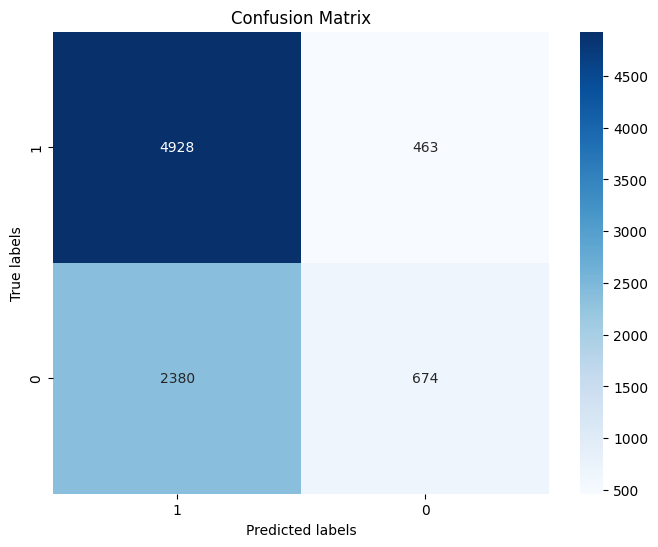

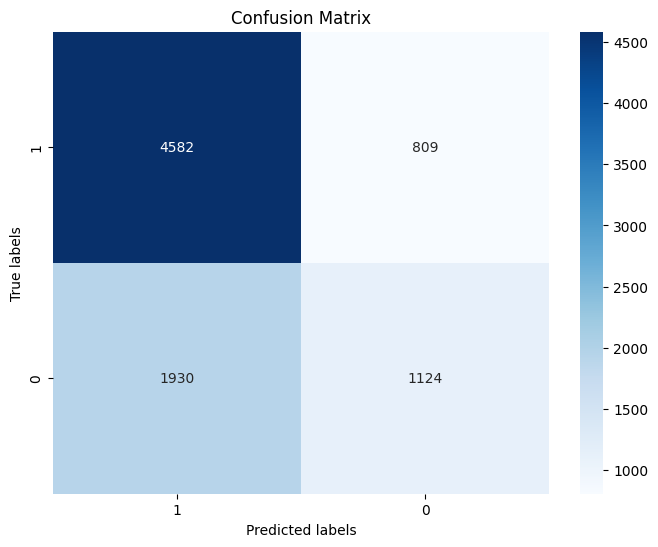

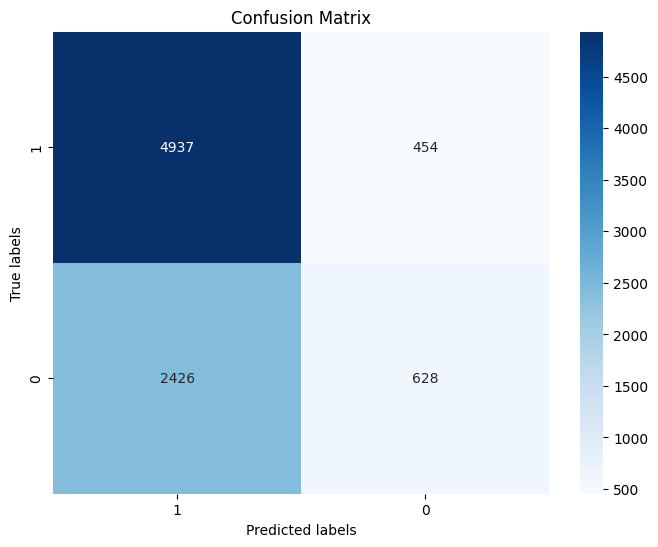

In [ ]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

labels = [1, 0]

accuracy_list = []
specificity_list= []
sensitivity_list = []
for name, model in fitted_models.items() :
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred ,labels=[1,0])
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]
    accuracy_list.append(accuracy_score(Y_test,y_pred))
    specificity_list.append(TN/(FP+TN))
    sensitivity_list.append(TP/(FN+TP))

# Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

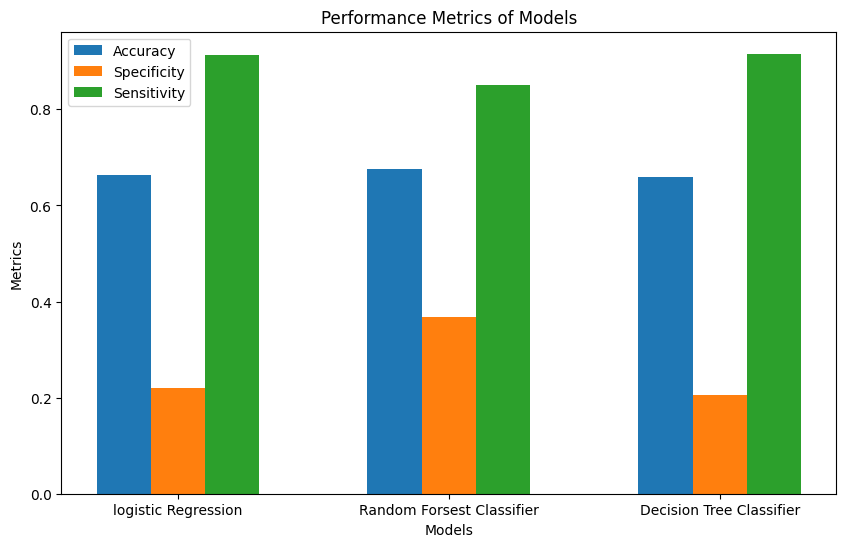

In [ ]:
# Create bar plot
model_names = ['logistic Regression','Random Forsest Classifier','Decision Tree Classifier']
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.bar([x - 0.2 for x in range(len(fitted_models))],accuracy_list, width=0.2, label='Accuracy')
# Plotting specificity
plt.bar([x for x in range(len(fitted_models))], specificity_list, width=0.2, label='Specificity')
# Plotting sensitivity
plt.bar([x + 0.2 for x in range(len(fitted_models))], sensitivity_list, width=0.2, label='Sensitivity')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics of Models')
plt.xticks(range(len(model_names)),model_names  )
plt.legend()
plt.show()